In [8]:
import pandas as pd 

df = pd.read_csv(r'C:\Users\hello\anaconda3\envs\tensorflow\male_players (legacy).csv\male_players (legacy).csv')

<ipython-input-8-9cdcf2b48e78>:3: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\hello\anaconda3\envs\tensorflow\male_players (legacy).csv\male_players (legacy).csv')


In [9]:
df = df[df['fifa_version'] == 23]

In [10]:
selected_columns = df[['rwb', 'lwb', 'rb', 'lb', 'cb', 'cdm', 'lm', 'rm', 'lw', 'rw', 'cf', 'st',
                      'defending_sliding_tackle', 'defending_standing_tackle', 'defending_marking_awareness',
                       'mentality_composure', 'mentality_penalties', 'mentality_vision', 'mentality_positioning',
                       'mentality_interceptions', 'mentality_aggression', 'power_long_shots', 'power_strength',
                       'power_stamina', 'power_jumping', 'power_shot_power', 'movement_balance', 'movement_reactions',
                       'movement_agility', 'movement_sprint_speed', 'movement_acceleration', 'skill_ball_control',
                       'skill_long_passing', 'skill_fk_accuracy', 'skill_curve', 'skill_dribbling', 'attacking_volleys',
                       'attacking_short_passing', 'attacking_heading_accuracy', 'attacking_finishing', 'attacking_crossing',
                       'defending', 'dribbling', 'passing', 'shooting', 'pace',
                       'long_name', 'player_positions', 'overall', 'potential']]

In [11]:
selected_columns.dropna(inplace=True)

<ipython-input-11-91a4bb12c116>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.dropna(inplace=True)


In [12]:
player_position = selected_columns[['rwb', 'lwb', 'rb', 'lb', 'cb', 'cdm', 'lm', 'rm', 'lw', 'rw', 'cf', 'st']]

In [13]:
player_attributes = selected_columns[['defending_sliding_tackle', 'defending_standing_tackle', 'defending_marking_awareness',
                       'mentality_composure', 'mentality_penalties', 'mentality_vision', 'mentality_positioning',
                       'mentality_interceptions', 'mentality_aggression', 'power_long_shots', 'power_strength',
                       'power_stamina', 'power_jumping', 'power_shot_power', 'movement_balance', 'movement_reactions',
                       'movement_agility', 'movement_sprint_speed', 'movement_acceleration', 'skill_ball_control',
                       'skill_long_passing', 'skill_fk_accuracy', 'skill_curve', 'skill_dribbling', 'attacking_volleys',
                       'attacking_short_passing', 'attacking_heading_accuracy', 'attacking_finishing', 'attacking_crossing',
                       'defending', 'dribbling', 'passing', 'shooting', 'pace',
                       'long_name', 'player_positions', 'overall', 'potential']]

# Data Understanding

## Univariate Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16467 entries, 143050 to 161582
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   defending_sliding_tackle     16467 non-null  int64  
 1   defending_standing_tackle    16467 non-null  int64  
 2   defending_marking_awareness  16467 non-null  int64  
 3   mentality_composure          16467 non-null  float64
 4   mentality_penalties          16467 non-null  int64  
 5   mentality_vision             16467 non-null  int64  
 6   mentality_positioning        16467 non-null  int64  
 7   mentality_interceptions      16467 non-null  int64  
 8   mentality_aggression         16467 non-null  int64  
 9   power_long_shots             16467 non-null  int64  
 10  power_strength               16467 non-null  int64  
 11  power_stamina                16467 non-null  int64  
 12  power_jumping                16467 non-null  int64  
 13  power_shot_powe

In [16]:

def plot_player_skill_distribution(df, skills, legend_fontsize):
    """
    Plot the distribution of player skills for each skill in a grid of separate histograms,
    add red lines at the above average and above 75th percentile thresholds,
    and display the number of players above each threshold for each skill.

    Parameters:
    df (DataFrame): The DataFrame containing player skills and values.
    skills (list): A list of skill column names.
    legend_fontsize (int): Font size for the legend text.

    Returns:
    None
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("The input 'df' must be a DataFrame.")

    if not all(skill in df.columns for skill in skills):
        raise ValueError("All skills in the 'skills' list must be columns in the DataFrame.")

    num_skills = len(skills)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_skills + num_cols - 1) // num_cols  # Calculate the number of rows needed

    # Define colors for the thresholds
    threshold_colors = ['orange', 'red']

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))
    fig.suptitle('Distribution of Player Skills by Skill', fontsize=16)

    for i, skill in enumerate(skills):
        row = i // num_cols
        col = i % num_cols

        skill_data = df[skill]

        ax = axes[row, col]
        _, _, patches = ax.hist(skill_data, bins=10, alpha=0.5, label=skill)  # Added label for legend
        
        # Plot vertical lines for summary statistics
        ax.axvline(skill_data.min(), color='green', linestyle='dashed', linewidth=2, label=f'Min: {skill_data.min():.2f}')
        ax.axvline(skill_data.max(), color='purple', linestyle='dashed', linewidth=2, label=f'Max: {skill_data.max():.2f}')
        ax.axvline(skill_data.quantile(0.25), color='blue', linestyle='dashed', linewidth=2, label=f'25th: {skill_data.quantile(0.25):.2f}')
        ax.axvline(skill_data.median(), color='black', linestyle='dashed', linewidth=2, label=f'Median: {skill_data.median():.2f}')
        ax.axvline(skill_data.quantile(0.75), color='cyan', linestyle='dashed', linewidth=2, label=f'75th: {skill_data.quantile(0.75):.2f}')
        ax.axvline(skill_data.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {skill_data.mean():.2f}')

        # Set the legend font size
        legend = ax.legend(fontsize=legend_fontsize)

    # Hide any empty subplots if the number of skills is not a multiple of num_cols
    for i in range(len(skills), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

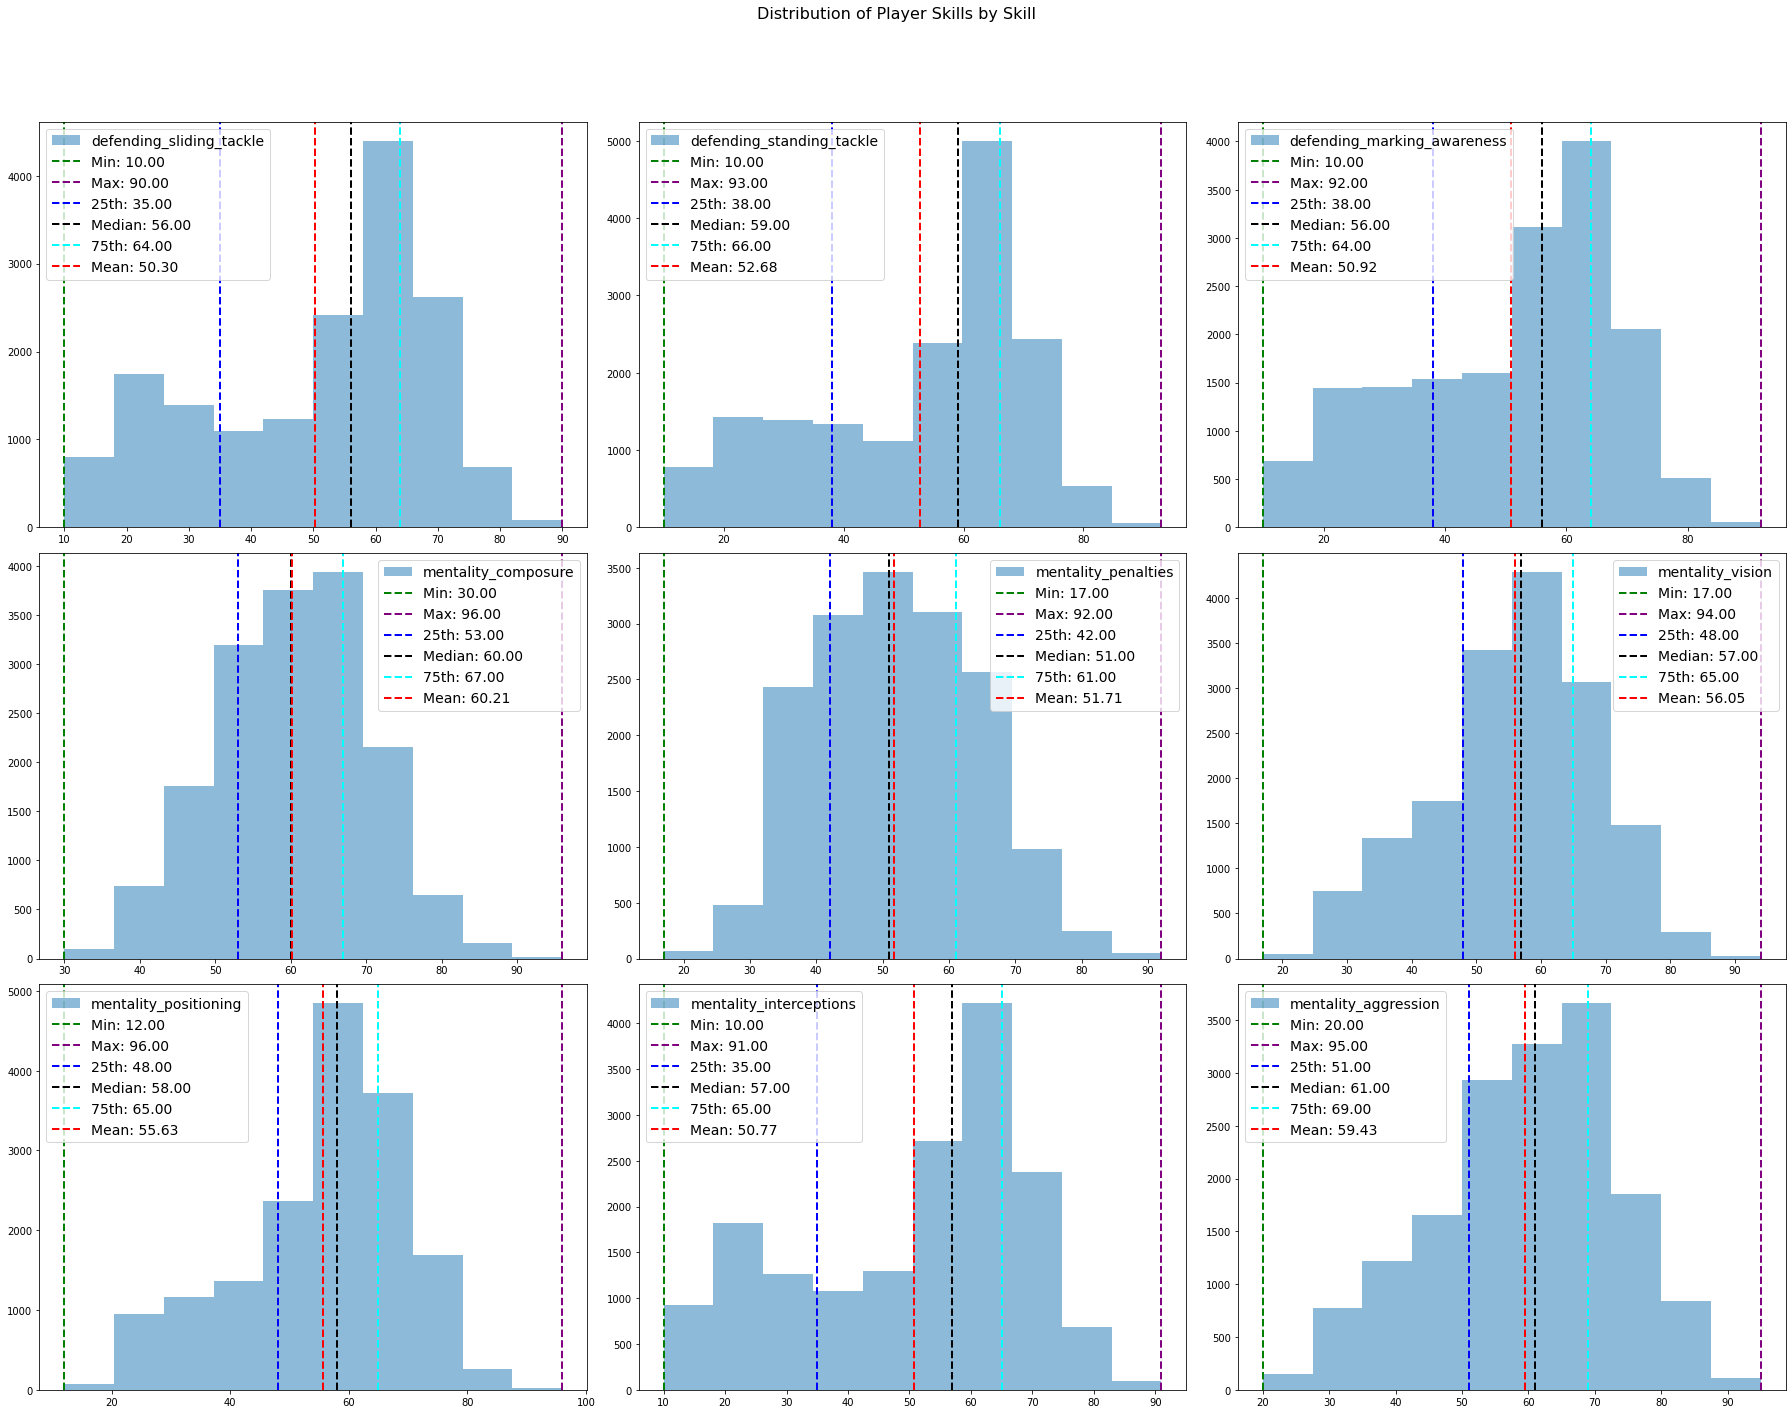

In [17]:
plot_player_skill_distribution(player_attributes, 
                               skills=['defending_sliding_tackle', 'defending_standing_tackle', 
                                       'defending_marking_awareness',
                                      'mentality_composure', 'mentality_penalties', 
                                       'mentality_vision', 'mentality_positioning',
                       'mentality_interceptions', 'mentality_aggression'], legend_fontsize=14)
                              

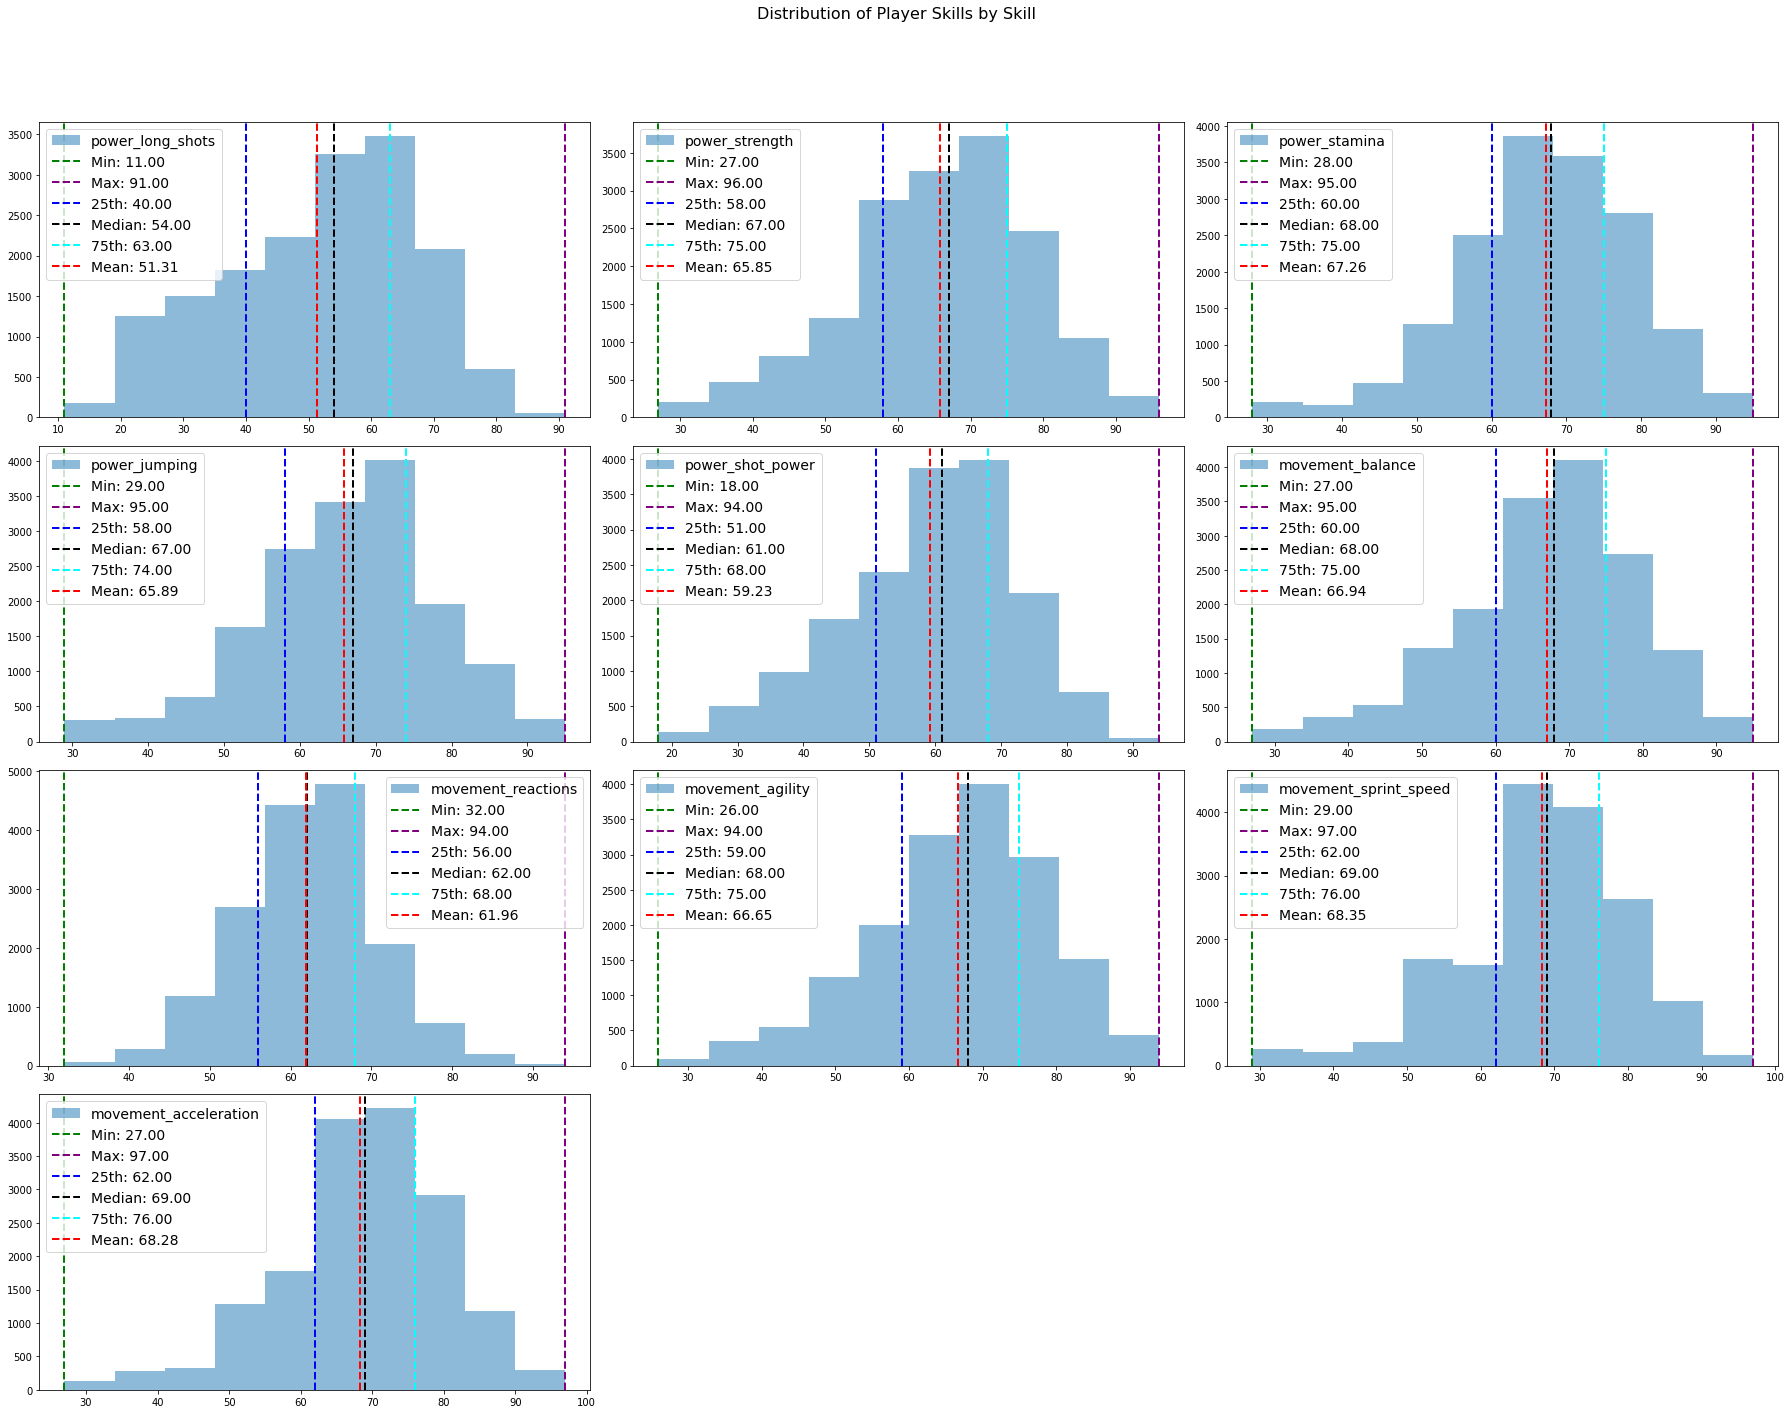

In [18]:
plot_player_skill_distribution(player_attributes, 
                               skills=['power_long_shots', 'power_strength',
                       'power_stamina', 'power_jumping', 'power_shot_power',
                                      'movement_balance', 'movement_reactions',
                       'movement_agility', 'movement_sprint_speed', 'movement_acceleration'], legend_fontsize=14)

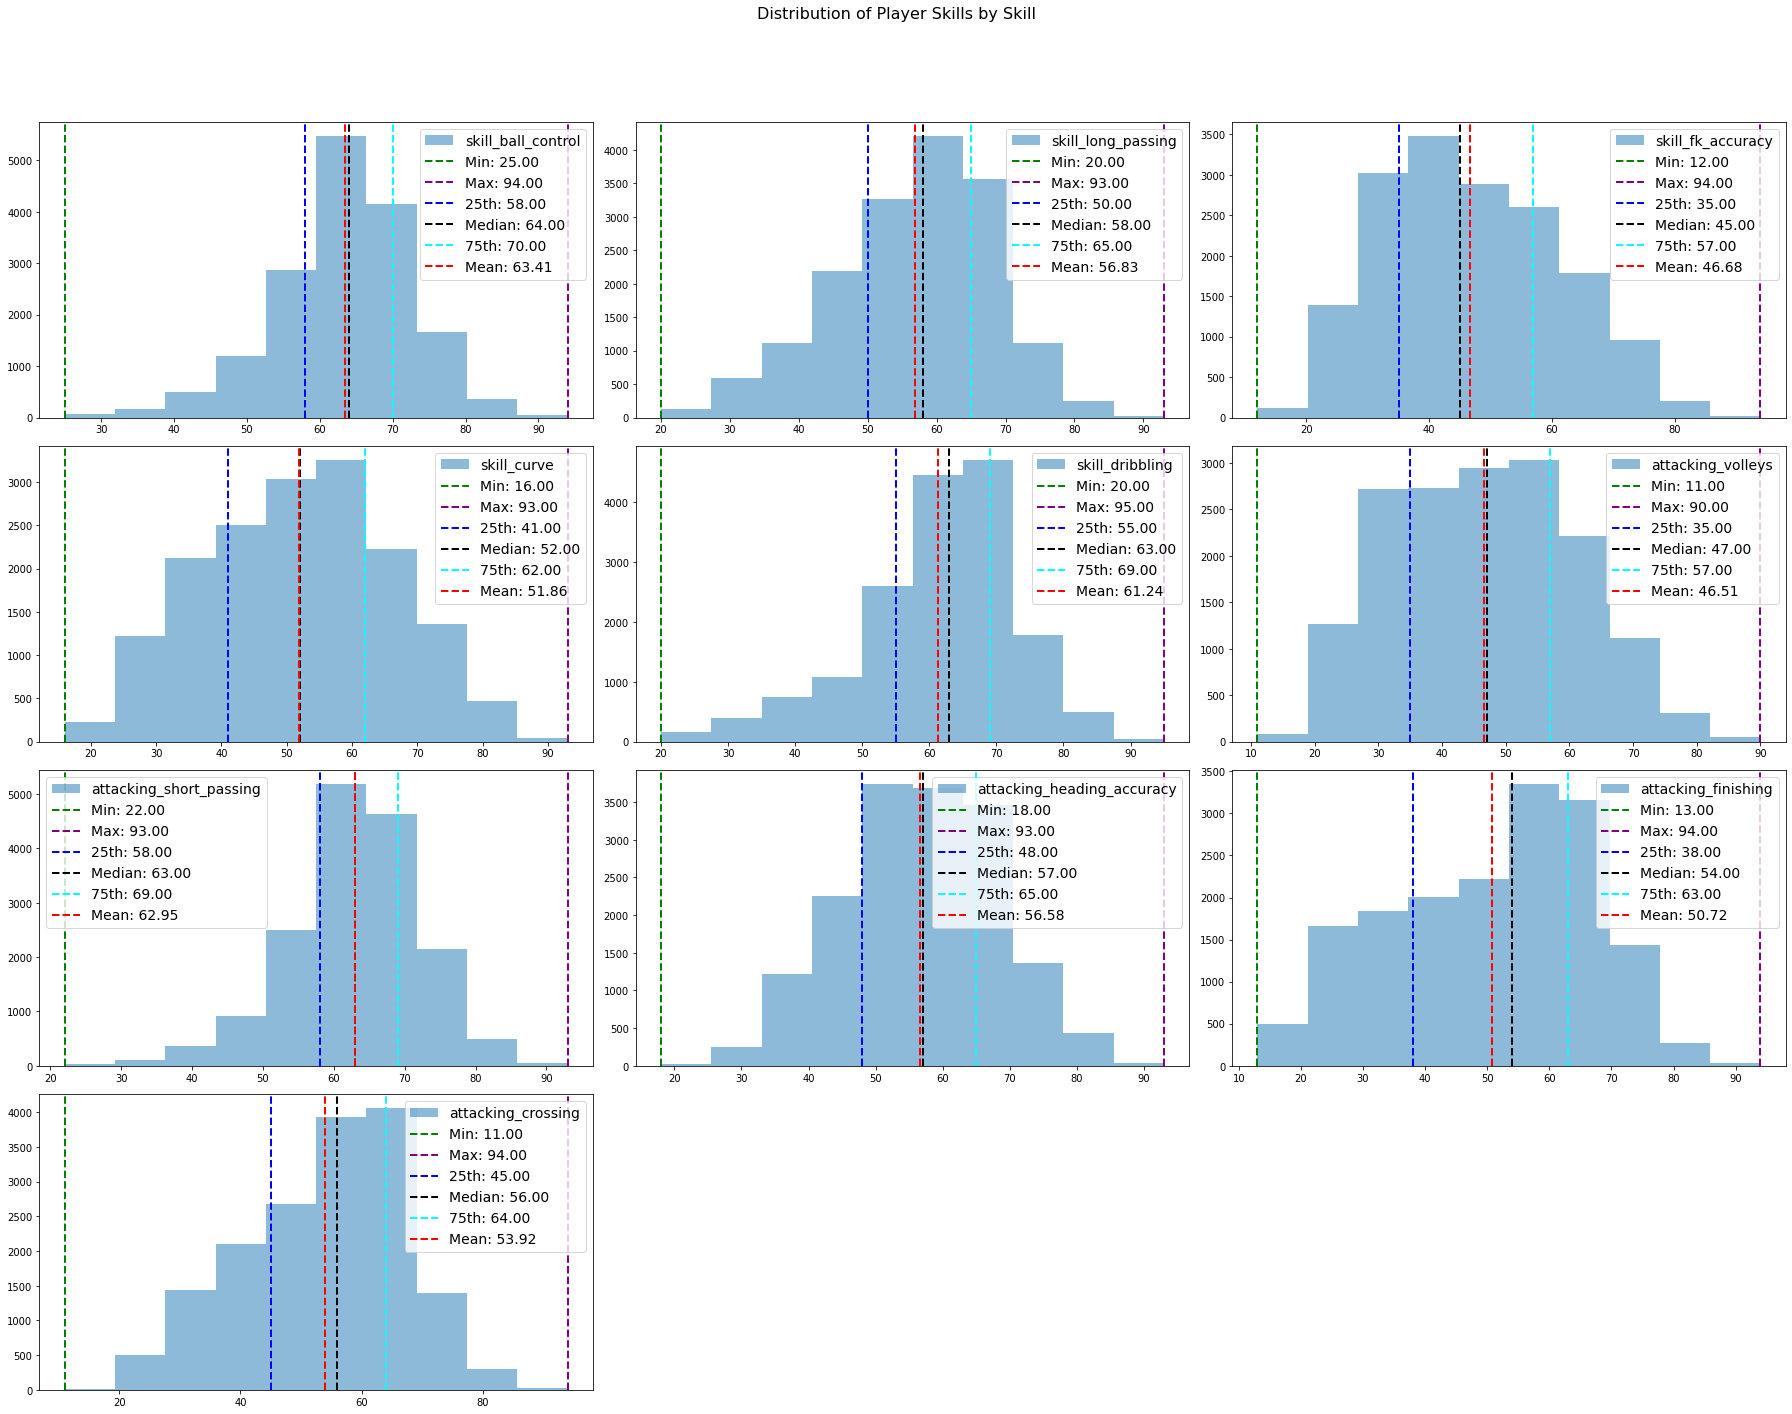

In [19]:
plot_player_skill_distribution(player_attributes, 
                               skills=['skill_ball_control',
                       'skill_long_passing', 'skill_fk_accuracy', 'skill_curve', 'skill_dribbling',
                        'attacking_volleys','attacking_short_passing', 
                        'attacking_heading_accuracy', 'attacking_finishing', 'attacking_crossing'], legend_fontsize=14)

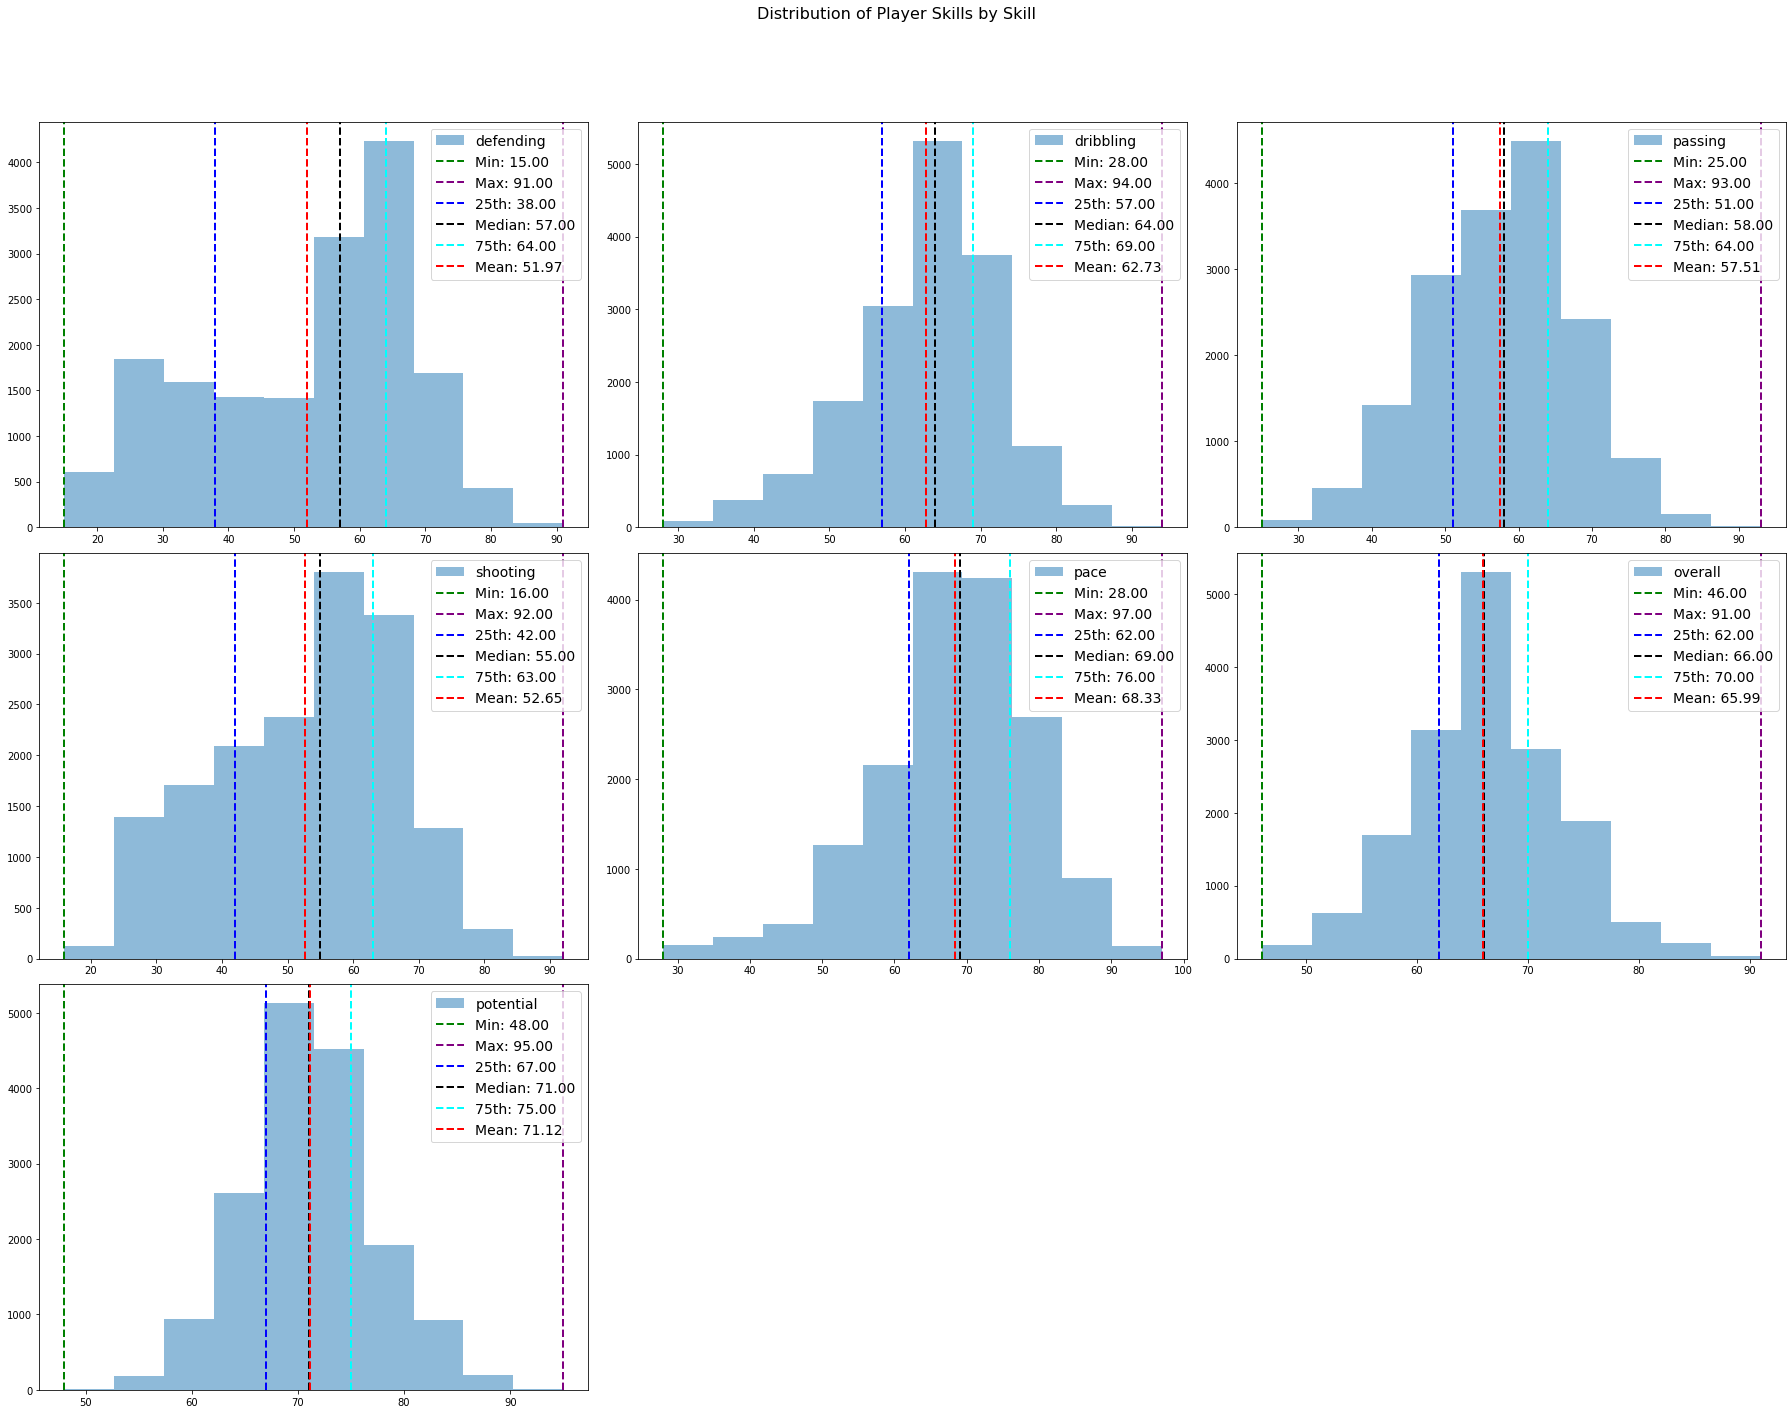

In [20]:
plot_player_skill_distribution(player_attributes, 
                               skills=['defending', 'dribbling', 'passing', 'shooting', 'pace','overall', 'potential'], 
                               legend_fontsize=14)

In [23]:
import scipy

In [24]:
def analyze_distribution(data, selected_columns=None, alpha=0.05):
    """
    Analyze the distribution of a given dataset or specific columns in a DataFrame.

    Parameters:
    data (array-like or DataFrame): The input data.
    selected_columns (list, optional): A list of column names if 'data' is a DataFrame. Default is None.
    alpha (float, optional): The significance level for the normality test. Default is 0.05.

    Returns:
    dict: A dictionary containing skewness, kurtosis, and the result of the normality test for each selected column.
    """
    result = {}

    if isinstance(data, pd.DataFrame):
        # If 'data' is a DataFrame, analyze selected columns
        if selected_columns is None:
            selected_columns = data.columns

        for column in selected_columns:
            column_data = data[column]
            
            # Calculate skewness and kurtosis
            skewness = scipy.stats.skew(column_data)
            kurtosis = scipy.stats.kurtosis(column_data)

            # Perform normality test (Anderson-Darling test)
            stat, crit_values, significance_level = scipy.stats.anderson(column_data, dist='norm')
            is_normal = stat < crit_values[2]

            result[column] = {'Skewness': skewness, 'Kurtosis': kurtosis,
                              'Normality_Test': {'Statistic': stat, 'Significance_Level': significance_level, 'Is_Normal': is_normal}}

    else:
        # If 'data' is not a DataFrame, analyze the entire dataset
        # Calculate skewness and kurtosis
        skewness = scipy.stats.skew(data)
        kurtosis = scipy.stats.kurtosis(data)

        # Perform normality test (Anderson-Darling test)
        stat, crit_values, significance_level = scipy.stats.anderson(data, dist='norm')
        is_normal = stat < crit_values[2]

        result['Overall'] = {'Skewness': skewness, 'Kurtosis': kurtosis,
                             'Normality_Test': {'Statistic': stat, 'Significance_Level': significance_level, 'Is_Normal': is_normal}}

    return result

In [25]:
selected_columns = ['defending_sliding_tackle', 'defending_standing_tackle', 
                                       'defending_marking_awareness',
                                      'mentality_composure', 'mentality_penalties', 
                                       'mentality_vision', 'mentality_positioning',
                       'mentality_interceptions', 'mentality_aggression',
                       'power_long_shots', 'power_strength',
                       'power_stamina', 'power_jumping', 'power_shot_power',
                                      'movement_balance', 'movement_reactions',
                       'movement_agility', 'movement_sprint_speed', 'movement_acceleration',
                        'skill_ball_control',
                       'skill_long_passing', 'skill_fk_accuracy', 'skill_curve', 'skill_dribbling',
                        'attacking_volleys','attacking_short_passing', 
                        'attacking_heading_accuracy', 'attacking_finishing', 'attacking_crossing',
                        'defending', 'dribbling', 'passing', 'shooting', 'pace','overall', 'potential']

result = analyze_distribution(player_attributes, selected_columns=selected_columns)

# Print the results
for column, stats in result.items():
    print(f"Column: {column}")
    print("Skewness:", stats['Skewness'])
    print("Kurtosis:", stats['Kurtosis'])
    print("Normality Test:", stats['Normality_Test'])
    print("--------------------")

Column: defending_sliding_tackle
Skewness: -0.565103382734625
Kurtosis: -0.8942261029376439
Normality Test: {'Statistic': 504.33967254512027, 'Significance_Level': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Is_Normal': False}
--------------------
Column: defending_standing_tackle
Skewness: -0.6274830564994262
Kurtosis: -0.7816590916147939
Normality Test: {'Statistic': 525.8582773989074, 'Significance_Level': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Is_Normal': False}
--------------------
Column: defending_marking_awareness
Skewness: -0.4993630282680474
Kurtosis: -0.7861606517693129
Normality Test: {'Statistic': 322.8959748049456, 'Significance_Level': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Is_Normal': False}
--------------------
Column: mentality_composure
Skewness: -0.026169315511711137
Kurtosis: -0.3057472393387357
Normality Test: {'Statistic': 13.549768726650655, 'Significance_Level': array([15. , 10. ,  5. ,  2.5,  1. ]), 'Is_Normal': False}
--------------------
Column: mentality_pena

## Multivariate Analysis

In [26]:
def extract_and_convert_position(df, column_names):
    """
    Extracts the numerical part from the given column in the DataFrame and converts it to an integer.

    Parameters:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the column containing soccer player positions.

    Returns:
    DataFrame: A new DataFrame with the extracted and converted values.
    """
    for column_name in column_names:
        # Extract numerical part using regular expression
        df[column_name] = df[column_name].str.extract('(\d+)')

        # Convert the extracted values to integers
        df[column_name] = df[column_name].astype(int)

    return df

In [27]:
player_position = extract_and_convert_position(player_position, ['rwb', 'lwb', 'rb', 'lb', 'cb', 'cdm', 'lm', 'rm', 'lw', 'rw', 'cf', 'st'])

In [28]:
player_position

,rwb,lwb,rb,lb,cb,cdm,lm,rm,lw,rw,cf,st
143050,64,64,59,59,50,63,89,89,90,90,91,87
143051,64,64,60,60,55,64,86,86,87,87,89,89
143052,64,64,61,61,60,66,83,83,85,85,88,89
143053,79,79,75,75,69,79,88,88,88,88,87,83
143054,67,67,63,63,54,63,89,89,90,90,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...
161578,37,37,36,36,31,32,46,46,46,46,46,47
161579,43,43,44,44,48,41,35,35,34,34,33,35
161580,47,47,47,47,46,45,47,47,46,46,46,46
161581,34,34,32,32,28,30,44,44,46,46,46,47


In [29]:
player_skills = player_attributes[['defending_sliding_tackle', 'defending_standing_tackle', 
                                       'defending_marking_awareness',
                                      'mentality_composure', 'mentality_penalties', 
                                       'mentality_vision', 'mentality_positioning',
                       'mentality_interceptions', 'mentality_aggression',
                       'power_long_shots', 'power_strength',
                       'power_stamina', 'power_jumping', 'power_shot_power',
                                      'movement_balance', 'movement_reactions',
                       'movement_agility', 'movement_sprint_speed', 'movement_acceleration',
                        'skill_ball_control',
                       'skill_long_passing', 'skill_fk_accuracy', 'skill_curve', 'skill_dribbling',
                        'attacking_volleys','attacking_short_passing', 
                        'attacking_heading_accuracy', 'attacking_finishing', 'attacking_crossing',
                        'defending', 'dribbling', 'passing', 'shooting', 'pace']]

In [30]:
import scipy.stats

def significant_correlations_by_position(df1, df2, significance_level=0.05):
    """
    Finds significant Spearman rank correlations between positions in df1 and variables in df2.

    Parameters:
    df1 (DataFrame): The first input DataFrame with positions.
    df2 (DataFrame): The second input DataFrame with variables.
    significance_level (float): The significance level for correlation tests. Default is 0.05.

    Returns:
    dict: A dictionary where each position is associated with a list of variables that have significant correlation.
    """
    position_variables_dict = {}

    for position in df1.columns:
        correlations = []
        for variable in df2.columns:
            spearman_corr, p_value = scipy.stats.spearmanr(df1[position], df2[variable])
            if p_value < significance_level:
                correlations.append(variable)

        if correlations:
            position_variables_dict[position] = correlations

    return position_variables_dict

def common_and_unique_values(dictionary):
    """
    Finds values that appear in all keys and values that don't in a dictionary.

    Parameters:
    dictionary (dict): The input dictionary.

    Returns:
    tuple: A tuple containing two dictionaries - one for common values and one for unique values.
    Each dictionary maps positions to their respective values.
    """
    if not dictionary:
        return {}, {}

    all_values = set()
    common_values = set(dictionary[next(iter(dictionary))])

    for key, values in dictionary.items():
        all_values.update(values)
        common_values.intersection_update(values)

    unique_values = all_values - common_values

    common_dict = {key: list(common_values) for key in dictionary}
    unique_dict = {key: list(unique_values - set(values)) for key, values in dictionary.items()}

    return common_dict, unique_dict

In [31]:
sig_corr_dict = significant_correlations_by_position(player_position, player_skills)

common_vals, unique_vals = common_and_unique_values(sig_corr_dict)

print("All Values Except:", unique_vals)

All Values Except: {'rwb': ['attacking_volleys', 'shooting'], 'lwb': ['attacking_volleys', 'shooting'], 'rb': ['mentality_positioning', 'pace', 'movement_sprint_speed', 'movement_acceleration'], 'lb': ['mentality_positioning', 'pace', 'movement_sprint_speed', 'movement_acceleration'], 'cb': [], 'cdm': ['movement_balance'], 'lm': ['power_jumping', 'attacking_heading_accuracy'], 'rm': ['power_jumping', 'attacking_heading_accuracy'], 'lw': [], 'rw': [], 'cf': ['power_jumping'], 'st': []}


# Data Preparation

## Data Selection and Feature Engineering

### Wingback Variables

In [32]:
y_wb = player_position[['rwb', 'lwb']]
X_wb = player_skills.drop(columns=['attacking_volleys', 'shooting'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

In [34]:
X_train_wb, X_test_wb, y_train_wb, y_test_wb = train_test_split(X_wb, y_wb, test_size=0.3, random_state=42)

In [35]:
def plot_explained_variance_ratio(df, random_state=None, svd_solver='auto'):
    """
    Plot the explained variance ratio for each component in PCA.

    Parameters:
    - df (DataFrame): The input DataFrame for PCA.
    - random_state (int or None, optional): Random seed for reproducibility.
    - svd_solver (str, optional): SVD solver to use in PCA.

    Returns:
    None
    """
    # Standardize the data
    standardized_data = (df - df.mean()) / df.std()

    # Fit PCA
    pca = PCA(random_state=random_state, svd_solver=svd_solver)
    pca.fit(standardized_data)

    # Plot the explained variance ratio
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. Number of Components')
    plt.show()

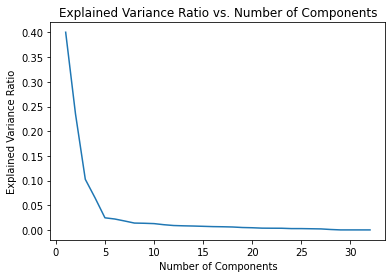

In [36]:
plot_explained_variance_ratio(X_train_wb, random_state=42, svd_solver='full')

In [37]:
pca_solver = PCA(n_components=5, random_state=42, svd_solver='full')
X_train_wb = pca_solver.fit_transform(X_train_wb)
X_test_wb = pca_solver.transform(X_test_wb)

### RB & LB Variables

In [38]:
y_lrb = player_position[['rb', 'lb']]
X_lrb = player_skills.drop(columns=['movement_acceleration', 'mentality_positioning', 'movement_sprint_speed', 'pace'])

In [39]:
X_train_lrb, X_test_lrb, y_train_lrb, y_test_lrb = train_test_split(X_lrb, y_lrb, test_size=0.3, random_state=42)

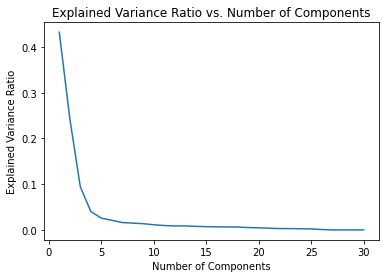

In [40]:
plot_explained_variance_ratio(X_train_lrb, random_state=42, svd_solver='full')

In [41]:
pca_lrb = PCA(n_components=4, random_state=42, svd_solver='full')
X_train_lrb = pca_lrb.fit_transform(X_train_lrb)
X_test_lrb = pca_lrb.transform(X_test_lrb)

### CDM Variables

In [42]:
y_cdm = player_position[['cdm']]
X_cdm = player_skills.drop(columns=['movement_balance'])

In [43]:
X_train_cdm, X_test_cdm, y_train_cdm, y_test_cdm = train_test_split(X_cdm, y_cdm, test_size=0.3, random_state=42)

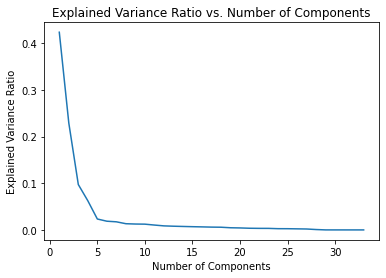

In [44]:
plot_explained_variance_ratio(X_train_cdm, random_state=42, svd_solver='full')

In [45]:
pca_cdm = PCA(n_components=5, random_state=42, svd_solver='full')
X_train_cdm = pca_cdm.fit_transform(X_train_cdm)
X_test_cdm = pca_cdm.transform(X_test_cdm)

### LM & RM Variables

In [46]:
y_lrm = player_position[['lm', 'rm']]
X_lrm = player_skills.drop(columns=['attacking_heading_accuracy', 'power_jumping'])

In [47]:
X_train_lrm, X_test_lrm, y_train_lrm, y_test_lrm = train_test_split(X_lrm, y_lrm, test_size=0.3, random_state=42)

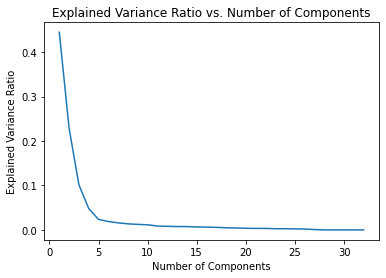

In [48]:
plot_explained_variance_ratio(X_train_lrm, random_state=42, svd_solver='full')

In [49]:
pca_lrm = PCA(n_components=5, random_state=42, svd_solver='full')
X_train_lrm = pca_lrm.fit_transform(X_train_lrm)
X_test_lrm = pca_lrm.transform(X_test_lrm)

### CF Variables

In [50]:
y_cf = player_position[['cf']]
X_cf = player_skills.drop(columns=['power_jumping'])

In [51]:
X_train_cf, X_test_cf, y_train_cf, y_test_cf = train_test_split(X_cf, y_cf, test_size=0.3, random_state=42)

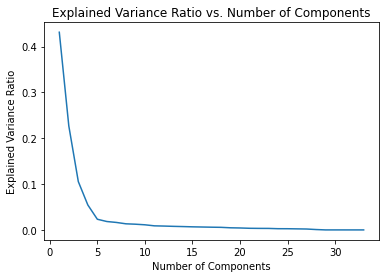

In [52]:
plot_explained_variance_ratio(X_train_cf, random_state=42, svd_solver='full')

In [53]:
pca_cf = PCA(n_components=5, random_state=42, svd_solver='full')
X_train_cf = pca_cf.fit_transform(X_train_cf)
X_test_cf = pca_cf.transform(X_test_cf)

### Rest Variables

In [54]:
y_rest = player_position[['cb', 'lw', 'rw', 'st']]
X_rest = player_skills

In [55]:
X_train_rest, X_test_rest, y_train_rest, y_test_rest = train_test_split(X_rest, y_rest, test_size=0.3, random_state=42)

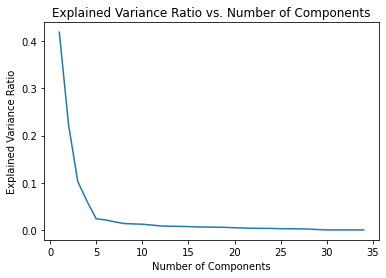

In [56]:
plot_explained_variance_ratio(X_train_rest, random_state=42, svd_solver='full')

In [57]:
pca_rest = PCA(n_components=5, random_state=42, svd_solver='full')
X_train_rest = pca_rest.fit_transform(X_train_rest)
X_test_rest = pca_rest.transform(X_test_rest)

# Modelling

### Wingback

X_train_wb, X_test_wb, y_train_wb, y_test_wb

#### Tree Based 

In [61]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer
from numpy import absolute
from sklearn.model_selection import cross_val_score

In [62]:
cv_regressor = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
scoring_regression = make_scorer(mean_absolute_error, greater_is_better=False)

In [63]:
# Define the parameter grid for grid search
param_grid_wb = {  
    'max_depth': [6, 8, 10],         
    'eta': [0.003, 0.03, 0.3]
}

# Create the logistic regression model
xgb_wb = XGBRegressor()

# Perform grid search with cross-validation
grid_search_wb = GridSearchCV(xgb_wb, param_grid_wb, cv=cv_regressor, scoring=scoring_regression)
grid_search_wb.fit(X_train_wb, y_train_wb)

# Get the best parameters and the best estimator
best_params_wb = grid_search_wb.best_params_
best_model_wb = grid_search_wb.best_estimator_

In [64]:
scores = cross_val_score(best_model_wb, X_test_wb, y_test_wb, scoring='neg_mean_absolute_error', cv=cv_regressor)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.948 (0.018)


In [65]:
predictions = best_model_wb.predict(X_test_wb)
residuals = y_test_wb - predictions
standardized_residuals = residuals / np.std(residuals)

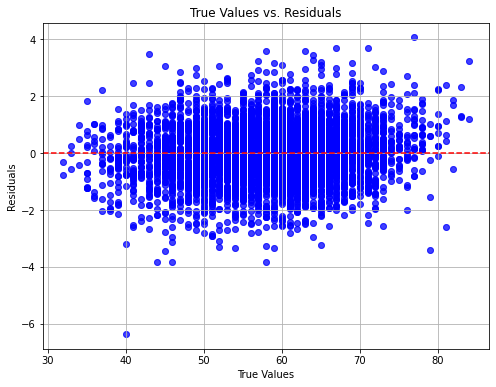

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_wb, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### RB & LB 

In [67]:
# Define the parameter grid for grid search
param_grid_lrb = {  
    'max_depth': [6, 8, 10],         
    'eta': [0.003, 0.03, 0.3]
}

# Create the logistic regression model
xgb_lrb = XGBRegressor()

# Perform grid search with cross-validation
grid_search_lrb = GridSearchCV(xgb_lrb, param_grid_lrb, cv=cv_regressor, scoring=scoring_regression)
grid_search_lrb.fit(X_train_lrb, y_train_lrb)

# Get the best parameters and the best estimator
best_params_lrb = grid_search_lrb.best_params_
best_model_lrb = grid_search_lrb.best_estimator_

In [68]:
scores = cross_val_score(best_model_lrb, X_test_lrb, y_test_lrb, scoring='neg_mean_absolute_error', cv=cv_regressor)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 1.322 (0.035)


In [69]:
predictions = best_model_lrb.predict(X_test_lrb)
residuals = y_test_lrb - predictions
standardized_residuals = residuals / np.std(residuals)

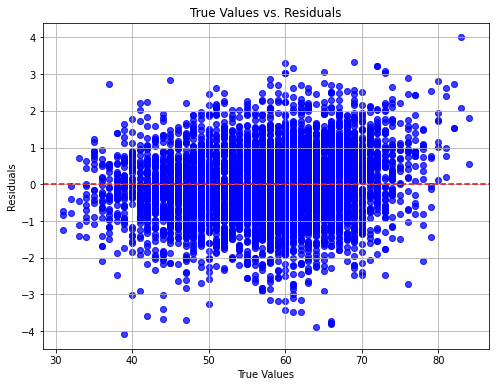

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_lrb, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### CDM

In [71]:
# Define the parameter grid for grid search
param_grid_cdm = {  
    'max_depth': [6, 8, 10],         
    'eta': [0.003, 0.03, 0.3]
}

# Create the logistic regression model
xgb_cdm = XGBRegressor()

# Perform grid search with cross-validation
grid_search_cdm = GridSearchCV(xgb_cdm, param_grid_cdm, cv=cv_regressor, scoring=scoring_regression)
grid_search_cdm.fit(X_train_cdm, y_train_cdm)

# Get the best parameters and the best estimator
best_params_cdm = grid_search_cdm.best_params_
best_model_cdm = grid_search_cdm.best_estimator_

In [72]:
scores = cross_val_score(best_model_cdm, X_test_cdm, y_test_cdm, scoring='neg_mean_absolute_error', cv=cv_regressor)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.833 (0.017)


In [73]:
predictions = best_model_cdm.predict(X_test_cdm)
residuals = y_test_cdm['cdm'].values - predictions
standardized_residuals = residuals / np.std(residuals)

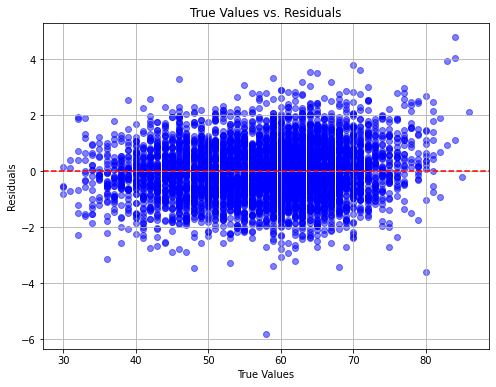

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cdm['cdm'].values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### LM & RM Variables

X_train_lrm, X_test_lrm, y_train_lrm, y_test_lrm

In [75]:
# Define the parameter grid for grid search
param_grid_lrm = {  
    'max_depth': [6, 8, 10],         
    'eta': [0.003, 0.03, 0.3]
}

# Create the logistic regression model
xgb_lrm = XGBRegressor()

# Perform grid search with cross-validation
grid_search_lrm = GridSearchCV(xgb_lrm, param_grid_lrm, cv=cv_regressor, scoring=scoring_regression)
grid_search_lrm.fit(X_train_lrm, y_train_lrm)

# Get the best parameters and the best estimator
best_params_lrm = grid_search_lrm.best_params_
best_model_lrm = grid_search_lrm.best_estimator_

In [76]:
scores = cross_val_score(best_model_lrm, X_test_lrm, y_test_lrm, scoring='neg_mean_absolute_error', cv=cv_regressor)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.973 (0.025)


In [77]:
predictions = best_model_lrm.predict(X_test_lrm)
residuals = y_test_lrm - predictions
standardized_residuals = residuals / np.std(residuals)

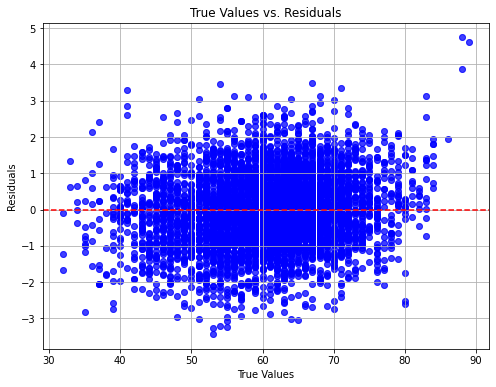

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_lrm, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### CF Variables

X_train_cf, X_test_cf, y_train_cf, y_test_cf

In [79]:
# Define the parameter grid for grid search
param_grid_cf = {  
    'max_depth': [6, 8, 10],         
    'eta': [0.003, 0.03, 0.3]
}

# Create the logistic regression model
xgb_cf = XGBRegressor()

# Perform grid search with cross-validation
grid_search_cf = GridSearchCV(xgb_cf, param_grid_cf, cv=cv_regressor, scoring=scoring_regression)
grid_search_cf.fit(X_train_cf, y_train_cf)

# Get the best parameters and the best estimator
best_params_cf = grid_search_cf.best_params_
best_model_cf = grid_search_cf.best_estimator_

In [80]:
scores = cross_val_score(best_model_cf, X_test_cf, y_test_cf, scoring='neg_mean_absolute_error', cv=cv_regressor)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 1.085 (0.020)


In [81]:
predictions = best_model_cf.predict(X_test_cf)
residuals = y_test_cf['cf'].values - predictions
standardized_residuals = residuals / np.std(residuals)

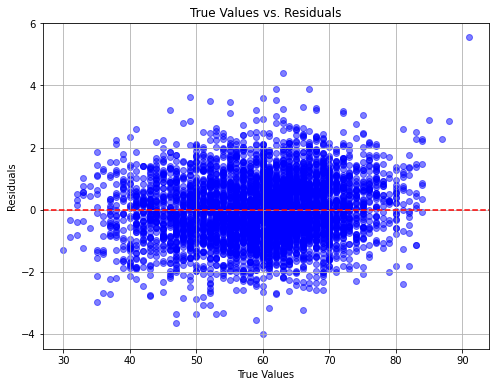

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cf['cf'].values, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Rest Variables

X_train_rest, X_test_rest, y_train_rest, y_test_rest

In [83]:
# Define the parameter grid for grid search
param_grid_rest = {  
    'max_depth': [6, 8, 10],         
    'eta': [0.003, 0.03, 0.3]
}

# Create the logistic regression model
xgb_rest = XGBRegressor()

# Perform grid search with cross-validation
grid_search_rest = GridSearchCV(xgb_rest, param_grid_rest, cv=cv_regressor, scoring=scoring_regression)
grid_search_rest.fit(X_train_rest, y_train_rest)

# Get the best parameters and the best estimator
best_params_rest = grid_search_rest.best_params_
best_model_rest = grid_search_rest.best_estimator_

In [84]:
scores = cross_val_score(best_model_rest, X_test_rest, y_test_rest, scoring='neg_mean_absolute_error', cv=cv_regressor)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 1.050 (0.017)


In [85]:
predictions = best_model_rest.predict(X_test_rest)
residuals = y_test_rest - predictions
standardized_residuals = residuals / np.std(residuals)

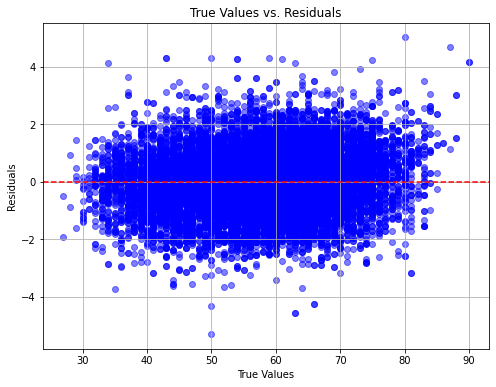

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rest, standardized_residuals, c='b', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('True Values vs. Residuals')
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()